# 插值与拟合

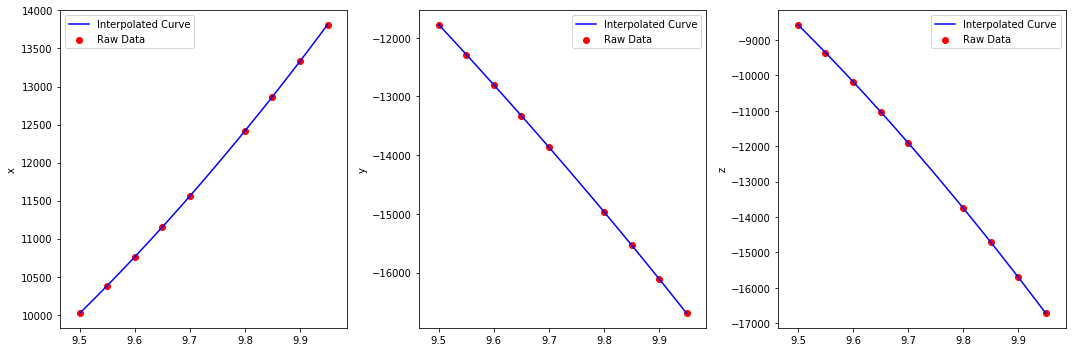

In [85]:
from scipy.optimize import fsolve
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


def eqs(d):
    return lambda x : [x[0]**2 + x[1]**2 + x[2]**2 - d[0]**2,
                       x[1]**2 + (x[1] - 4500)**2 + x[2]**2 - d[1]**2,
                       (x[0] + 2000)**2 + (x[1] - 1500)**2 + x[2]**2 - d[2]**2]


data = np.loadtxt('15.D 导弹.txt')
t = data[:,0]
coordinate = np.array([fsolve(eqs(data[i][1:]), [1,1,1]) for i in range(data.shape[0])]).T
t = np.r_[t[:5], t[6:]]
coordinate = np.c_[coordinate[:, :5], coordinate[:, 6:]]

tt = np.linspace(data[:, 0].min(), data[:,0].max(), 100)
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(t, coordinate[0], c='r', label='Raw Data')
f = interp1d(t, coordinate[0], kind=3)
plt.plot(tt, f(tt), c='b', label='Interpolated Curve')
plt.ylabel('x')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(t, coordinate[1], c='r', label='Raw Data')
f = interp1d(t, coordinate[1], kind=3)
plt.plot(tt, f(tt), c='b', label='Interpolated Curve')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(t, coordinate[2], c='r', label='Raw Data')
f = interp1d(t, coordinate[2], kind=3)
plt.plot(tt, f(tt), c='b', label='Interpolated Curve')
plt.ylabel('z')
plt.legend() 

plt.tight_layout()
plt.show()

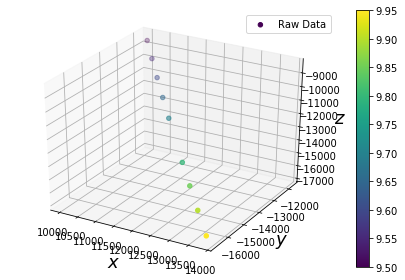

In [94]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(*coordinate, c=t, label='Raw Data')
fig.colorbar(scatter)

tt = np.linspace(data[:, 0].min(), data[:,0].max(), 100)
f = interp1d(t, coordinate[0], kind=3)

# ax.plot_surface(*coordinate, rstride=1, cstride=1, cmap='rainbow')

ax.legend()
ax.set_zlabel(r"$z$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)
ax.legend()
plt.legend()
plt.tight_layout()
plt.show()